# Introduction
In a series of weekly articles, I will be covering some important topics of statistics with a twist.

The goal is to use Python to help us get intuition on complex concepts, empirically test theoretical proofs, or build algorithms from scratch. In this series, you will find articles covering topics such as random variables, sampling distributions, confidence intervals, significance tests, and more.

At the end of each article, you can find exercises to test your knowledge. The solutions will be shared in the article of the following week.

Articles published so far:
- [Bernoulli and Binomial Random Variables with Python](https://towardsdatascience.com/bernoulli-and-binomial-random-variables-d0698288dd36)
- [From Binomial to Geometric and Poisson Random Variables with Python](https://towardsdatascience.com/geometric-and-poisson-random-variables-with-python-e5dcb63d6b55)
- [Sampling Distribution of a Sample Proportion with Python](https://towardsdatascience.com/sampling-distributions-with-python-f5a5f268f636)
- [Confidence Intervals with Python](https://towardsdatascience.com/confidence-intervals-with-python-bfa28ebb81c)
- Significance Tests with Python

As usual the code is available on my [GitHub](https://github.com/luisroque/College_Statistics_with_Python).

# Introduction to Hypothesis Tests

António was on a 30-day holiday with a group of 4 friends and they wanted to decide who would cook dinner each night. António proposed that they could write their names down and store them in a bowl. Then, he would randomly pick a name from a bowl and the name that came up had to cook dinner that night. Now, let's say that after 4 rounds of randomly selecting names, António's name never came up. The remaining friends started to suspect that something was going on. Let's compute that probability.

In [154]:
0.80**4

0.4096000000000001

We can see that this scenario has close to 41% of probability of happening. It is a very significant probability, so the group of friends should probably trust António. Now, image that after 15 rounds, António still does not get picked.

In [155]:
0.8**15

0.03518437208883203

Assuming that the process is completely random, the probability that he would not be picked 15 rounds in a row is about 3.5%. If his friends used the often defined threshold of 5%, they would not expect that an event that happened purely by chance had a probability less than 5%. Then they would probably reject the hypothesis that this was a truly random process, which would mean that António was cheating.

# Hypothesis test about a Population Proportion

One day, at the beach, António read an article in a magazine that stated that only 30% of people use sunscreen at the beach. António thought that the number was too low for the beach area where they were spending their holiday. He told his friends and they decide to random sample 35 people from the nearby beaches, where, that day, they estimated that at least 400 people were enjoying the beach. From the 35 people, 14 were using sunscreen.

In [298]:
14/35

0.4

Let's define our hypothesis test more formally:

$$\begin{align}H_0: p=0.3 \\
H_a: p>0.3
\end{align}$$

The null hypothesis shows the expected outcome, the assumption that only 30% of people uses sunscreen at the beach. On the other hand, the alternative hypothesis states what António was suspecting: that more than 30% of people were actually using sunscreen.

To see how likely a sample like the one above was to happen by random chance, let's perform a simulation. We simulate 40 samples of sample size equal to 30 where 40% of the people were using sunscreen.

In [414]:
from scipy.stats import bernoulli, norm, t
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [316]:
x = np.zeros((40, 35))
for i in range(40):    
    x[i] = bernoulli.rvs(p=0.3, size=35)

We can plot our simulations using a histogram.

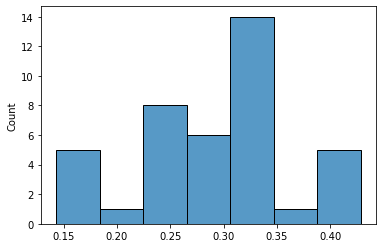

In [317]:
sns.histplot(np.mean(x, axis=1));

In [318]:
p = np.mean(x, axis=1)

With this information we are able to compute our p-value. It can be defined as the probability of $\hat p$ being greater or equal to the sampled proportion of 0.4, conditioned on $H_0$ being true:

$$\text{p-value}= P(\hat p \geq 0.4 | H_0 \text{True})$$

We can easily compute the p-value.

In [319]:
p[p>=0.40].shape[0]/p.shape[0]

0.125

If António uses the significance level of $\alpha=0.05$, he would not reject $H_0$. It means that with a $\hat p = 0.4$, they don't have enough evidence to reject the possibility that only 30% of the people are using suncreen and the statistic they got of 40% was a result of  random chance alone.

In [320]:
if (p[p>=0.4].shape[0]/p.shape[0]<0.05):
    print('Reject H_0')
else:
    print('Do not reject H_0')

Do not reject H_0


# Conditions for a Z Test about a Proportion

We saw in previous articles the conditions to perform a z test. The 3 conditions are:
* The sample has to
be random.
* A normal distribution can approximate the sampling distribution of the sample proportions. The rule of thumb is that you need to have at least 10 successes and 10 failures.
* The samples are required to be independent. The rule of thumb is that if you are sampling without replacement, your sample size should be less than 10% of the population size.

Let's work through our previous example and test for each of the conditions. Starting with the random sampling, we were told that the group of friends selected the people to ask randomly. With that information we are going to assume that their process was truly random. The normal condition tells us that the expected number of successes and failures need to be at least equal to 10. We were also able to meet the criteria (see the calculations below). Finally, we have the independence condition. In our case, the population size was the people in the beach area, which was about 400. The sample size used was 35, so we were also able to meet the condition to perform a z test.

In [321]:
n = 35
p = 0.3

print('np = '+ str(n*p))
print('n(1-p) = '+ str(n*(1-p)))

np = 10.5
n(1-p) = 24.5


# Calculating a z statistic in a test about a proportion

We will continue to use our sunscreen problem. In the previous section we checked that all conditions for inference have been met. In that case, we are going to perform a z test.

Before continuing let's recall our goal. From the entire population of the beach area, António and his friends took a sample of 35 people and calculated a sample statistic $\hat p = 40\%$. Now, assuming that the null hypothesis is true, what is the probability of getting a result this far away or further from the assumed population proportion $p=30\%$.

One way to calculate this probability is by calculating how many standard deviations away is the sampled proportion from the true proportion (remember that we always assume that $H_0$ is true, so we consider that the true proportion).

$$Z =\frac{\hat p - p_0}{\sqrt{\frac{p_0 \cdot (1-p_0)}{n}}}$$

In [327]:
p_0 = 0.3
p_hat = 0.4

Z = (0.4-0.3)/np.sqrt((0.3*(1-0.3)/n))
Z

1.290994448735806

Our p-value can then be defined as by:

$$P(Z \geq 1.29)$$

In [328]:
1-norm.cdf(Z)

0.09835280122947343

Comparing this probability that we got against the significance level of $\alpha=0.05$, we see, once again, that we can not reject $H_0$.

# Hypothesis Test about a Population Mean

One night, António was checking his phone and start wondering how many messages he and his friends were exchanging in a WhatsApp group chat, that they had setup 3 months before going on holiday. He suspected that, on average, they would send each other 180 messages a day but one of his friends argued that they exchanged more than 180 messages. They decided to test the theory.

Let's define our significance test:

$$\begin{align}
H_0&: \mu = 180 \\
H_a&: \mu > 180
\end{align}$$

They took a random sample of 8 days from the chat history and recorded how many messages were sent on those days. The sample data was approximately symmetric with a mean of 215 messages and a standard deviation of approximately 36 messages. They want to test their hypothesis with a significance level of 5%.

As we saw previously, in this case we will be performing a t test and not a z test. The reason is the fact that we do not know the standard deviation of the sampling distribution of the sample mean $\sigma_{\bar x}$. We can only estimate it using the sampling standard deviation $s_x$. We can then write our test as:

$$t = \frac{\bar x - \mu_0}{\frac{s_{x}}{\sqrt{n}}}$$

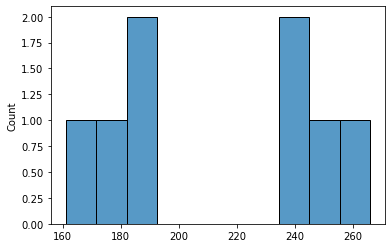

In [426]:
x = [266, 190, 161, 191, 241, 180, 240, 251]
x = np.asarray(x)
sns.histplot(x, bins=10);

In [420]:
print(x.mean())
print(x.std())

215.0
36.29738282576307


In [423]:
μ = 180
n = 8

t_star = (x.mean()-μ)/(x.std()/np.sqrt(n))
t_star

2.727330227672841

In [424]:
1-t.cdf(t_star, df=n-1)

0.01472601649385541

Our p-value is approximately 0.015, which is smaller than our significance level. This means that we can reject $H_0$, raised by António and accept the alternative hypothesis. There is enough evidence to accept the hypothesis of António's friend that the group sent more than 180 messages a day.

# Conditions for a t Test about a Population Mean

We saw in previous articles the conditions to perform a t test. The 3 conditions are:
* The sample has to be random.
* The sampling distribution of the sample mean can be approximated by a normal distribution. There are three ways to achieve it: sample size is bigger than 30 (central limit theorem applies), original distribution is normal, or the sampling distribution is symmetric and does not show outliers.
* The samples are required to be independent. The rule of thumb is that if you are sampling without replacement, your sample size should be less than 10% of the population size.

Once again, let's test our previous solved problem for each of the conditions. This will make us much more confident that the results are not biased in some way. We were told that António and his friend selected the days randomly, which meets the first criteria. Secondly, our sample distribution is roughly symmetric, so we can consider that the normal condition is also met. Finally, António and his friend used a sample size of 8. We were told that they had setup the WhatsApp group chat 3 months before going on holiday. The sample size represents less than 10%, so even if they sampled without replacement it is safe to assume independence between sampled days.

# Type I and Type II errors

We already saw that if the p-value is less than a significance level $\alpha$ we should reject $H_0$. Conversely, if the p-value is greater than $\alpha$ we should fail to reject $H_0$. When we perform these comparisons, there is always a probability that we are making an error. Let's draw a table to make it more clear.

|  | $H_0$ True   | $H_0$ False |
|------|------|------|
|   Reject $H_0$  | Type I error|  Correct  |
|   Fail to Reject $H_0$  | Correct |  Type II error  |

Notice that the probability of getting a Type I error is equal to the significance level. Imagine that you define a significance level of 5%. This means that 5% of the time, even if your null hypothesis is true, you going to get a statistic that is going to make you reject the null hypothesis.

What would be Type I and Type II errors in the example given before? Let's write down our hypothesis test again for the proportion people that use sunscreen:

$$\begin{align}H_0: p=0.3 \\
H_a: p>0.3
\end{align}$$

A Type I error would happen if the group of friends concludes that the people's proportion that use sunscreen is not equal to 0.3 when it actually is. On the other hand, a Type II error would be the case where the people's proportion is not equal to 0.3 but they fail to reject it.

Another important concept to define is the power of significance tests. It is the probability that you are rejecting the null hypothesis when it is not true.

$$\begin{align}
\text{Power} &= P(\text{reject} \; H_0 | H_0 \; \text{false}) \\
& = 1 - P(\text{not rejecting} \; H_0 | H_0 \; \text{false} )
\end{align}$$

Notice that the $P(\text{not rejecting} \; H_0 | H_0 \; \text{false} )$ is actually the probability of making a Type II error, so you can think of the power of a significance test as the probability of $\textbf{not}$ making a Type II error. 

Let's see what we can do to increase the power of our hypothesis tests:

* Increase the significance level (but notice that this will also increase the probability of a Type I error).
* Increase the sample size.
* Less variability in the data.
* If true parameter is far from the null hypothesis.

# Conclusion

In this article, we covered significance or hypothesis tests. These are extremely useful for using sampled data to evaluate the likelihood of a claim about a population value. The value to be tested could be a proportion or the mean of a population. We calculated p-values for both cases, using a z test and a t test, respectively.

We also addressed the errors that might happen when performing these tests. The Type I error has the same probability of happening as the defined significance level and translates the rejection of a null hypothesis which is actually true. When we fail to reject a null hypothesis and it is in fact false, we are producing a Type II error. Finally, we defined the power of a significance test as the probability of not making a Type II error, and saw ways to increase it.

# Exercises

You will get the solutions on next week's article.

1. According to a large poll from last year, about 85% of houses in Porto have access to high-speed internet. Marco wondered if the proportion had changed and took a random sample of 80 houses and found that 75 had access to high-speed internet. He wants to use this sample data to test if the proportion actually changed. Assuming that the conditions for inference were met, what would you conclude about the proportion of houses with high-speed internet considering a significance level of 1%?

2. Marta owns a fruit store and receives watermelons weekly. The supplier states that they are supposed to weigh 1kg. Marta decides to weigh a random sample of 100 watermelons and finds a mean weight of 850g and a standard deviation of 200g. She wants to use this sample data to test if the mean is smaller than the one claimed by the supplier and, if this is the case, renegotiate their contract. Assuming that the conditions for inference were met, what should Marta do (consider a significance level of 5%)?

### Answers from last week

1. Change the function `confidence_interval_mean_t` and build 5 different experiments to calculate a 95% interval for a sample mean, 3 of them where the conditions for a t interval are not met and 2 where they are. For the 3 where the conditions are not met define the following scenarios: sampling not random, original distribution not approximately normal and independence not met. For the 2 cases where conditions are met define: one case where the original distribution is normal and another where the original distribution is skewed but the sampling mean is normally distributed. For these last two cases, the true population mean should be contained in the calculated confidence intervals 95% of the time. 

*Hint: you might find useful to use the function `skewnorm` from `scipy`. Below, you have a modified version of a normal distribution skewed by a skewness parameter, mean and standard deviation.*

In [23]:
# code adapted from https://stackoverflow.com/questions/49367436/scipy-skewnorm-mean-not-matching-theory

skew = 4.0
mean = 2
stdev = 0.5

delta = skew / math.sqrt(1. + math.pow(skew, 2.))
adjStdev = math.sqrt(math.pow(stdev, 2.) / (1. - 2. * math.pow(delta, 2.) / math.pi))
adjMean = mean - adjStdev * math.sqrt(2. / math.pi) * delta

print('target mean={:.4f} actual mean={:.4f}'.format(mean, float(skewnorm.stats(skew, loc=adjMean, scale=adjStdev, moments='mvsk')[0])))
print('target stdev={:.4f} actual stdev={:.4f}'.format(stdev, math.sqrt(float(skewnorm.stats(skew, loc=adjMean, scale=adjStdev, moments='mvsk')[1]))))

target mean=2.0000 actual mean=2.0000
target stdev=0.5000 actual stdev=0.5000


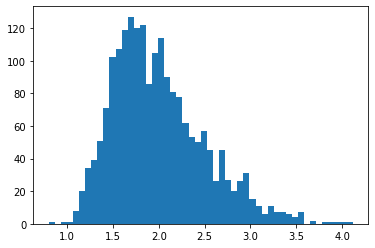

In [24]:
# Original skewed distribution

plt.hist(skewnorm.rvs(a = skew, loc=adjMean, scale=adjStdev, size=2000), bins=50);

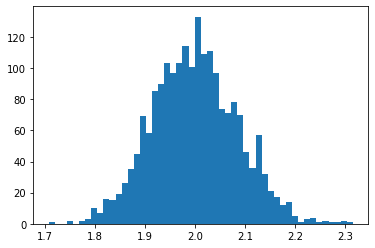

In [25]:
# Approximately normal distribution of the sample mean because sample 
# size is bigger than 30 (CTL applies)

plt.hist(np.mean([skewnorm.rvs(a = skew, loc=adjMean, scale=adjStdev, size=35) for _ in range(2000)], axis=1), bins=50);

In [26]:
def confidence_interval_mean_t(μ, σ, n, number_trials, N, ci=0.95, sample='random', dist='normal'):
    
    skew = 4.0
    mean = μ
    stdev = σ

    delta = skew / math.sqrt(1. + math.pow(skew, 2.))
    adjStdev = math.sqrt(math.pow(stdev, 2.) / (1. - 2. * math.pow(delta, 2.) / math.pi))
    adjMean = mean - adjStdev * math.sqrt(2. / math.pi) * delta
    
    if dist!='normal':
        x_ = skewnorm.rvs(a = 4, loc=adjMean, scale=adjStdev, size=N)
    else:
        x_ = norm.rvs(loc=μ, scale=σ, size=N)

    x_hat_list = []
    SE_hat_x_list = []
    
    if sample!='random':
        # Inducing bias on the sampling
        x_.sort()
        x_ = x_[:-int(0.2*N)]
        np.random.shuffle(x_)
    
    for i in range(number_trials):
        s_ = np.random.choice(x_, n, replace=False)
        x_hat = np.mean(s_)
        x_hat_list.append(x_hat)
        SE_hat_x_list.append(t.ppf(ci+(1-ci)/2, df=n-1)*np.std(s_)/np.sqrt(n))
    
    plt.hist(x_hat_list, bins=50)

    j=0
    _, ax = plt.subplots(1, 1, figsize=(6, 8))
    for i in range(len(x_hat_list)):
        if (μ>x_hat_list[i]-SE_hat_x_list[i]) & (μ<x_hat_list[i]+SE_hat_x_list[i]):
            # interval contains p
            if i > len(x_hat_list)-50:
                ax.errorbar(x_hat_list[i], np.arange(len(x_hat_list))[i],lolims=True, xerr=SE_hat_x_list[i], yerr=0.0, linestyle='', c='black')
            j +=1
        else:
            # interval does not contain p
            if i > len(x_hat_list)-50:    
                ax.errorbar(x_hat_list[i], np.arange(len(x_hat_list))[i],lolims=True, xerr=SE_hat_x_list[i], yerr=0.0, linestyle='', c='red')
    ax.axvline(μ, color='darkorange')
    #plt.xlim(0,1)
    plt.show()
    print(f'{j}/{number_trials}={np.round(j/number_trials,2)}')

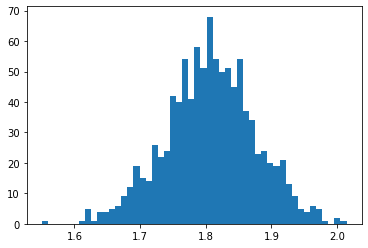

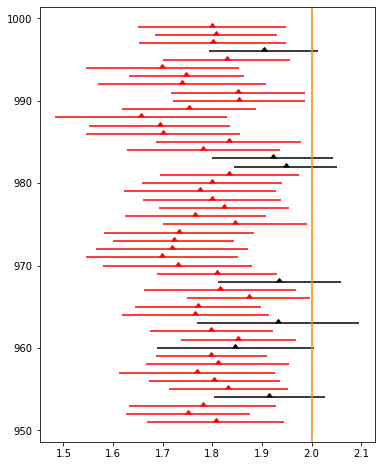

191/1000=0.19


In [27]:
# Not random sampling
confidence_interval_mean_t(μ=2, σ=0.5, n=35, number_trials=1000, N=500, sample='not_random')

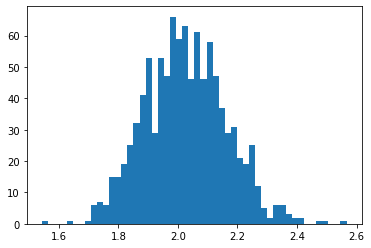

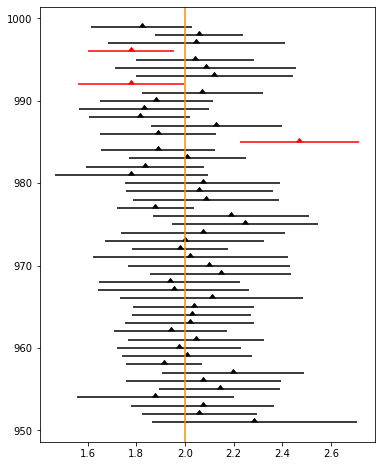

944/1000=0.94


In [28]:
# not approximately normal dist
confidence_interval_mean_t(μ=2, σ=0.5, n=15, number_trials=1000, N=500, dist='not normal')

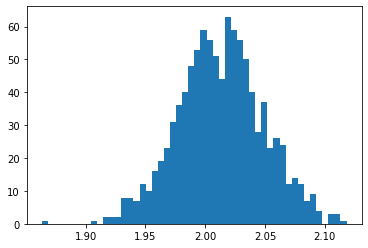

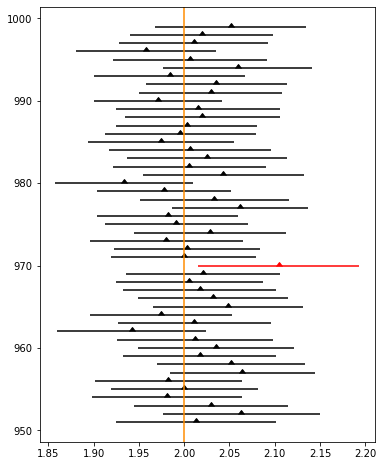

973/1000=0.97


In [29]:
# not independent samples
confidence_interval_mean_t(μ=2, σ=0.5, n=150, number_trials=1000, N=600, dist='not normal')

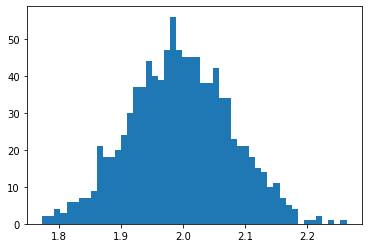

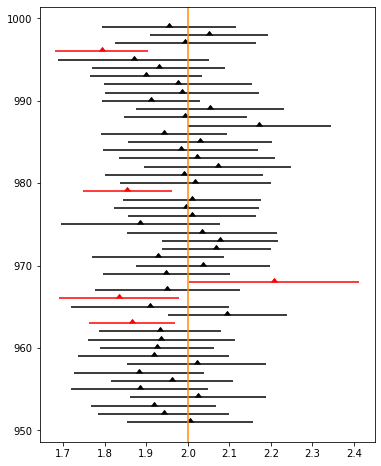

947/1000=0.95


In [30]:
# Not normal distribution but n >= 30, so CTL applies; all other conditions are met
confidence_interval_mean_t(μ=2, σ=0.5, n=35, number_trials=1000, N=500, dist='not normal')

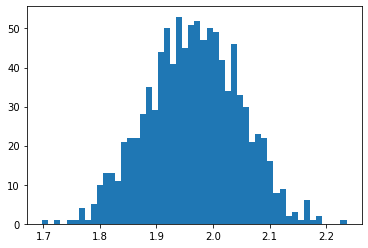

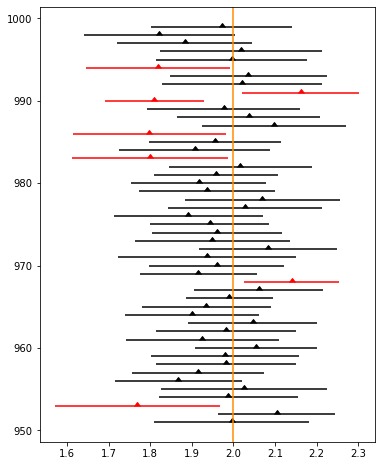

930/1000=0.93


In [31]:
# Original distribution is normal; all other conditions are met
confidence_interval_mean_t(μ=2, σ=0.5, n=35, number_trials=1000, N=500)